<a href="https://colab.research.google.com/github/kaustavr19/VIP_AINE-AI/blob/main/Project-8/Machine_Learning_for_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

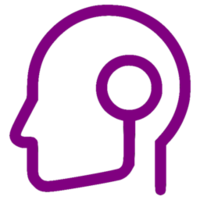
# Virtual Internship Program by AINE AI
## Machine Learning for Predictive Analytics

**Project :**
Reducing monthly churn by identifying high risk customers well in advance.

**About the Project:**
The project relates to applying predictive analytics on customer churn. A major telecom company’s postpaid business of voice-only plans is struggling
to maintain its strong foothold in local market because of:
- High churn rate amongst customers leading to a revenue decline of ~500k USD
every month
- Decline in overall customer base (high churn rate combined with low
acquisition rate), leading to a decline in total market share


**Aim:**
1. Build a classification model to predict churners one month in advance
2. Identify key churn drivers

## Packages and Setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive') #for importing files from g-drive

Mounted at /content/gdrive


## Reading data and initial processing

In [4]:
cust_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Telecom Data.csv")
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exploring the data

In [5]:
#shape of the data i.e. no. of rows and columns
cust_df.shape

(51047, 58)

In [6]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [7]:
#all the column names in the dataset
cust_df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [8]:
#total number of null values in each column
cust_df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [9]:
zero_monthlyrev = len(cust_df[cust_df.MonthlyRevenue == 0].index)
zero_monthlyrev

6

**Result:-**
>Here we can see that there are total of 6 people with mothly revenue of amount 0.

### Q1.2 How many columns has missing values percentage > 5%

In [10]:
#missing value percentage
missing_val_per = cust_df.isnull().sum() / cust_df.shape[0] * 100
missing_val_per

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.305601
MonthlyMinutes               0.305601
TotalRecurringCharge         0.305601
DirectorAssistedCalls        0.305601
OverageMinutes               0.305601
RoamingCalls                 0.305601
PercChangeMinutes            0.718945
PercChangeRevenues           0.718945
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

In [11]:
missing_val_5per = missing_val_per[missing_val_per > 5].keys()
missing_val_5per

Index([], dtype='object')

**Result:-**
> We can from the above result that we do not have any column/feature where missing values is greater than 5%. The highest percentage of missing values is 1.78%

> As the percentage is <5, we will simply drop the rows, as it will not affect the dataset as much.

In [12]:
#dropping the rows with null values
cust_df = cust_df.dropna()

In [13]:
#checking the number of null values at current state
cust_df.isnull().sum().sum()

0

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

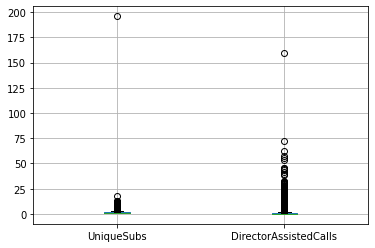

In [14]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [85]:
#top 1% of the values
qValue = [i/100 for i in range(95,101,1)] 
cust_df[cols].quantile(qValue)

,UniqueSubs,DirectorAssistedCalls
0.95,2.0,2.48
0.96,2.0,2.72
0.97,2.0,2.97
0.98,2.0,3.22
0.99,2.0,3.71
1.00,2.0,3.96


In [16]:
min_thres, max_thres = cust_df.UniqueSubs.quantile([0.000,0.95])
min_thres, max_thres

(1.0, 3.0)

In [17]:
#records below the minimum threshold of UniqueSubs
cust_df[cust_df.UniqueSubs<min_thres]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus


In [18]:
#records above the maximum threshold of UniqueSubs
cust_df[cust_df.UniqueSubs>max_thres]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
11,3000058,No,212.51,1972.0,85.0,2.23,250.0,35.5,-200.0,-106.8,9.0,0.0,43.7,0.3,0.0,718.1,49.3,4.7,351.7,128.7,9.0,0.0,1.0,59,5,1,SLCSLC801,10.0,6.0,199.0,30.0,22.0,Yes,No,Yes,No,No,Known,No,Yes,No,No,Yes,Yes,0,0,Yes,No,0,3,No,1,80,No,4-Medium,Suburban,Other,No
30,3000190,Yes,78.29,852.0,85.0,0.00,0.0,0.0,-206.0,0.0,10.7,6.3,47.0,1.0,0.0,304.8,54.7,29.7,200.7,74.0,17.0,0.0,6.0,53,5,4,SANMCA210,8.0,3.0,151.0,50.0,50.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,0,10,No,1-Highest,Town,Crafts,Yes
61,3000406,No,114.13,1650.0,83.0,1.73,52.0,0.0,-177.0,17.9,3.7,5.3,23.0,0.0,0.0,362.5,90.0,34.0,412.0,56.7,9.3,0.0,21.3,50,6,4,SANSAN210,4.0,4.0,306.0,40.0,34.0,No,Yes,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,Yes,0,4,No,0,130,No,1-Highest,Other,Clerical,No
65,3000422,No,95.17,161.0,89.0,0.00,0.0,0.0,78.0,34.0,0.7,0.7,1.3,0.0,0.0,31.6,14.0,0.0,38.0,22.7,1.3,0.0,0.0,56,4,4,DALDAL214,2.0,2.0,1116.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,30,No,1-Highest,Town,Other,Unknown
66,3000426,Yes,90.61,1151.0,95.0,0.25,22.0,0.0,225.0,-5.6,3.0,0.3,20.7,1.3,0.0,476.0,19.3,15.0,70.0,52.3,3.3,0.0,1.7,54,4,2,PHXTUC520,2.0,1.0,1599.0,0.0,0.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,30,No,1-Highest,Other,Other,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50542,3395946,Yes,30.00,130.0,30.0,0.00,0.0,0.0,138.0,0.0,5.3,1.3,11.7,0.0,0.0,47.5,13.3,0.0,31.3,26.3,6.7,0.0,0.0,34,4,1,LAXALB626,3.0,3.0,244.0,50.0,20.0,Yes,No,No,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,9,No,0,30,No,1-Highest,Suburban,Other,Yes
50547,3395990,No,27.74,148.0,32.0,0.25,0.0,0.0,24.0,-0.2,2.3,0.0,2.0,0.0,0.0,3.1,2.3,0.0,36.7,2.0,2.3,0.0,0.0,34,4,4,LAXDOW562,2.0,2.0,530.0,40.0,36.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,8,No,0,30,No,1-Highest,Other,Clerical,Yes
50583,3396298,No,51.15,209.0,50.0,0.99,0.0,0.2,95.0,0.5,4.0,0.3,16.3,0.0,0.7,29.9,11.0,1.0,44.7,14.7,4.3,0.0,1.3,34,6,5,LAXIRV949,4.0,2.0,344.0,36.0,36.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,Yes,Yes,Yes,0,0,No,No,0,7,No,0,30,No,1-Highest,Suburban,Other,Yes
50584,3396302,No,69.04,974.0,60.0,0.99,20.0,0.0,-49.0,-17.1,14.7,0.7,33.7,1.0,0.0,80.3,33.3,9.0,69.7,160.0,15.3,0.0,0.0,30,4,4,LAXCDG310,3.0,3.0,44.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,No,0,7,No,0,60,No,1-Highest,Other,Other,Yes


In [19]:
#refining the the dataset with values present within the threshold limits of UniqueSubs
cust_df = cust_df[(cust_df.UniqueSubs<max_thres) & (cust_df.UniqueSubs>=min_thres)]
cust_df.shape

(44842, 58)

In [20]:
#threshold limits for DirectorAssistedCalls
min_thres1, max_thres1 = cust_df.DirectorAssistedCalls.quantile([0.000,0.95])
min_thres1, max_thres1

(0.0, 4.21)

In [21]:
#refining the the dataset with values present within the threshold limits of DirectorAssistedCalls
cust_df = cust_df[(cust_df.DirectorAssistedCalls<max_thres1) & (cust_df.DirectorAssistedCalls>=min_thres1)]
cust_df.shape

(42566, 58)

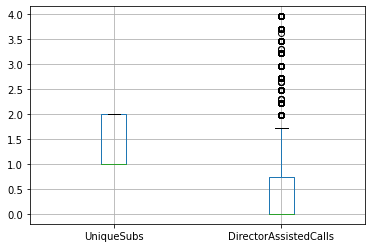

In [22]:
#checking the boxplot for outliers again
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

###Q2.1 Does customers with high overage minutes also have high revenue?

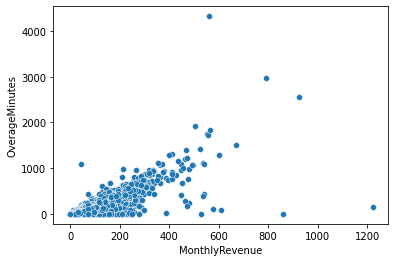

In [23]:
#scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

**Result:-**
> We can observe a positive correlation between AverageMinutes and MonthlyRevenue. Therefore, we can say that customer with high AverageMinutes has high MonthlyRevenue, though that may not always be the case. 

### Does high number of active subscribers lead to low monthly revenue?

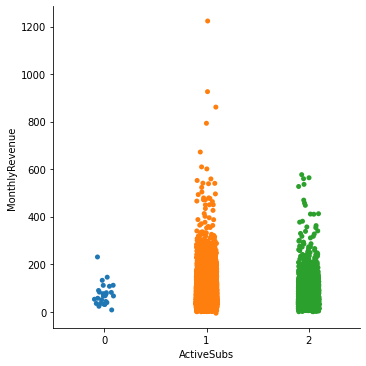

In [25]:
#category plot to plot monthly revenue for each active subs category
sns.catplot(x='ActiveSubs',y ='MonthlyRevenue',data=cust_df)

**Result:-**
> From the above category plot, we can see that, higher no of active subscribers lead to a little lower amount of monthly revenue.

### Q2.3 Does credit rating have an impact in churn rate?

In [26]:
pd.crosstab(cust_df.CreditRating, cust_df.Churn)

Churn,No,Yes
CreditRating,,
1-Highest,4508,1998
2-High,11484,4936
3-Good,4630,2011
4-Medium,3526,1221
5-Low,4390,1194
6-VeryLow,541,188
7-Lowest,1383,556


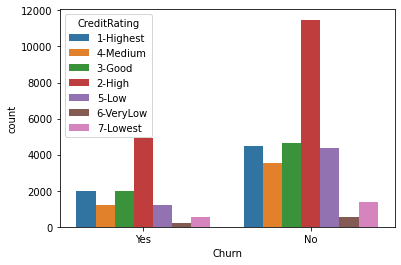

In [28]:
sns.countplot(x='Churn',hue='CreditRating',data=cust_df)

**Result:-**
> Credit rating does have an impact on churn rate. From the crosstabe, we can see that the the higher the credit rating the higher the churn is. The only exceptions are the the Highest and lowest credit rating.

## Additional Exploratory Data Analysis

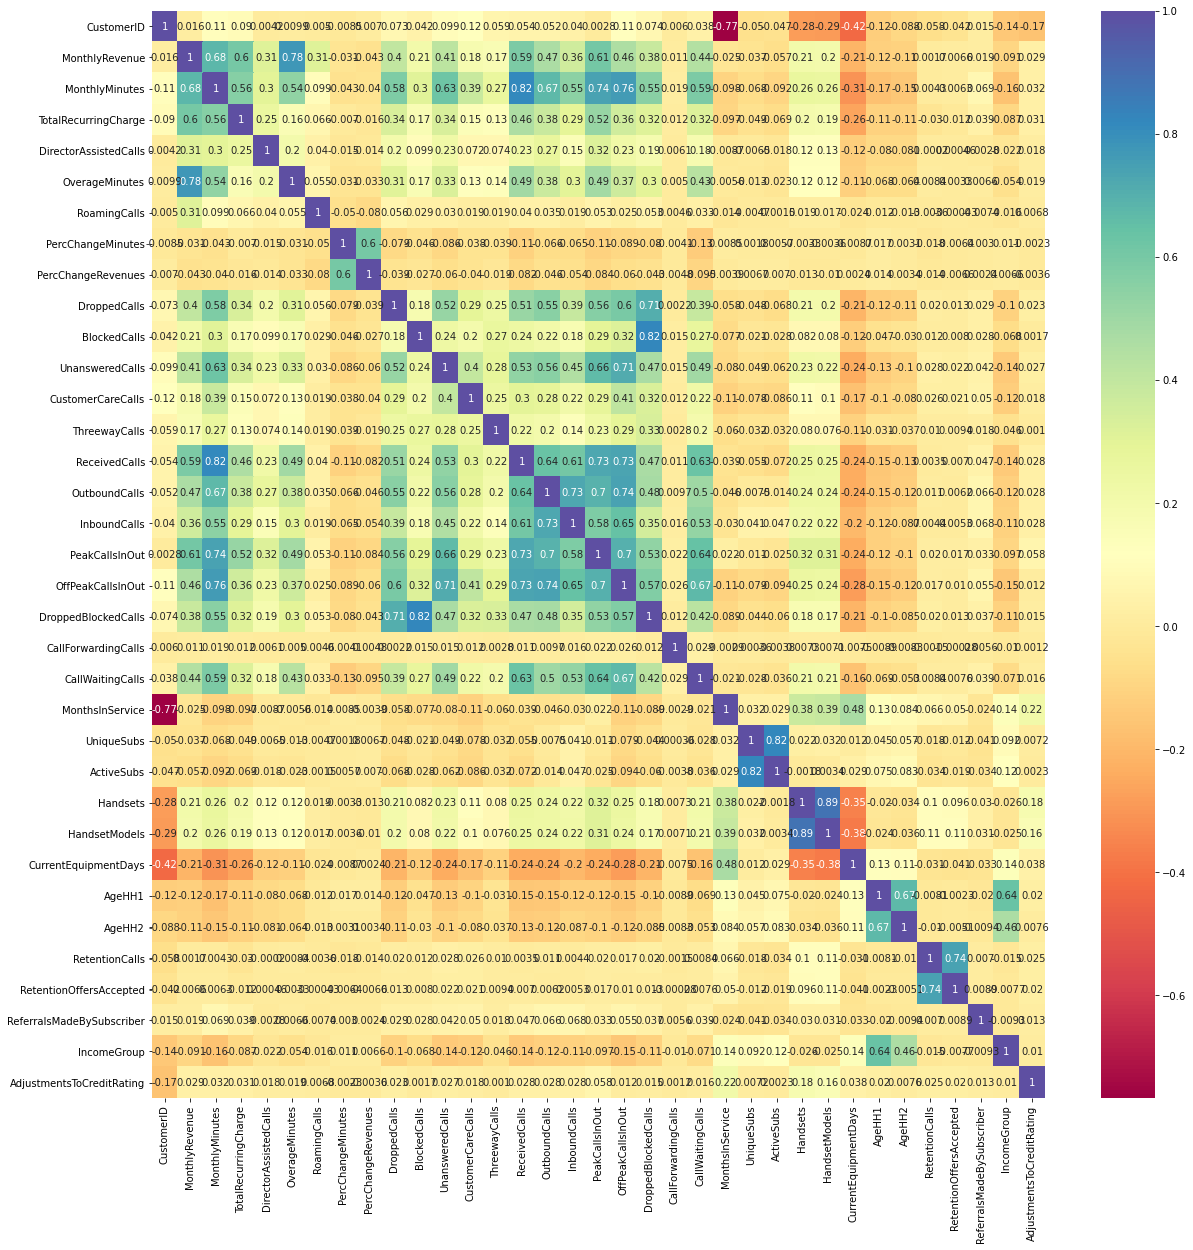

In [29]:
# calculating correlation among numeric variable
corr_matrix = cust_df.corr()

# plot correlation matrix
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix,cmap='Spectral',annot=True);

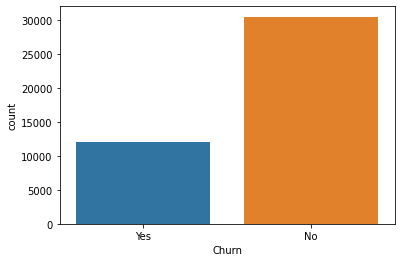

In [31]:
#a count check for the categorical variable
sns.countplot(x="Churn",data=cust_df)
plt.show()

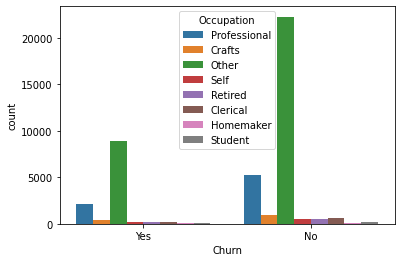

In [33]:
sns.countplot(x="Churn",hue="Occupation",data=cust_df)

## Q3. Create additional features to help predict churn

In [34]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge'] = cust_df['TotalRecurringCharge']/cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_avg_minutes'] = cust_df['OverageMinutes']/cust_df['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [35]:
#adding the new features in the main dataset
cust_df=create_features(cust_df)
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_avg_minutes
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,0.5,0.916667,0.000000
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,1.0,1.000589,0.000000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,1.0,1.000000,0.000000
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,1.0,0.911522,0.000000
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,1.0,0.991832,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,3399894,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,1.0,13.0,0.7,0.0,11.2,5.7,0.0,29.3,17.0,6.7,0.0,0.0,30,1,1,NEVELC619,1.0,1.0,883.0,48.0,48.0,Yes,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,4,No,0,Unknown,No,2-High,Other,Professional,No,1.0,inf,0.000000
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,NEVENC760,1.0,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes,1.0,0.532581,0.682540
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,LAXVNY818,1.0,1.0,882.0,50.0,60.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown,1.0,0.972357,0.005525
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,LAXDOW562,2.0,2.0,489.0,22.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,2,No,0,30,No,5-Low,Other,Professional,Yes,1.0,0.255341,0.651042


## Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [36]:
# List of variables to map

varlist =  ['Churn']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
cust_df[varlist] = cust_df[varlist].apply(binary_map)


In [37]:
cust_df.Churn

0        1
1        1
2        0
3        0
4        1
        ..
51035    0
51037    0
51040    0
51041    1
51043    0
Name: Churn, Length: 42566, dtype: int64

In [38]:
cust_df.isnull().sum()

CustomerID                 0
Churn                      0
MonthlyRevenue             0
MonthlyMinutes             0
TotalRecurringCharge       0
                        ... 
Occupation                 0
MaritalStatus              0
perc_active_subs           0
perc_recurrent_charge      3
perc_avg_minutes         578
Length: 61, dtype: int64

In [39]:
cust_df = cust_df.dropna()

In [40]:
cust_df.isnull().sum()

CustomerID               0
Churn                    0
MonthlyRevenue           0
MonthlyMinutes           0
TotalRecurringCharge     0
                        ..
Occupation               0
MaritalStatus            0
perc_active_subs         0
perc_recurrent_charge    0
perc_avg_minutes         0
Length: 61, dtype: int64

In [41]:
#replacing infinite values if any
cust_df.replace({-np.inf: -1_000_000, np.inf: 1_000_000}, inplace=True)

#### Over-sampling because the dataset is biased

In [42]:
count_class_0, count_class_1 = cust_df.Churn.value_counts()

df_class_0 = cust_df[cust_df['Churn']==0]
df_class_1 = cust_df[cust_df['Churn']==1]

In [43]:
df_class_0.shape

(30227, 61)

In [44]:
df_class_1.shape

(11759, 61)

In [46]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    30227
0    30227
Name: Churn, dtype: int64


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [47]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
X = df_test_over.drop(columns=['Churn'])
#Create dummy variables for all categorical variables
X = pd.get_dummies(X)


y = df_test_over['Churn']

In [48]:
#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

###Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set

In [50]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = log_reg.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

#accuracy score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5945856536362133

A confusion matrix is a technique for summarizing the performance of a classification algorithm.

Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.

In [53]:
#confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[5332, 3699],
       [3654, 5452]])

In [54]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

• Precision is how certain you are of your true positives. Recall is how certain you are that you are not missing any positives.
• Choose Recall if the occurrence of false negatives is unaccepted/intolerable. For example, in the case of diabetes that you would rather have some extra false positives (false alarms) over saving some false negatives.
• Choose Precision if you want to be more confident of your true positives. For example, in case of spam emails, you would rather have some spam emails in your inbox rather than some regular emails in your spam box. You would like to be extra sure that email X is spam before we put it in the spam box.
• Choose Specificity if you want to cover all true negatives, i.e. meaning we do not want any false alarms or false positives. For example, in case of a drug test in which all people who test positive will immediately go to jail, you would not want anyone drug-free going to jail.


In [55]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy


0.5945856536362133

In [56]:
Precision = true_positive/(true_positive+false_positive)
Precision


0.5904108072195771

In [57]:
Recall = true_positive/(true_positive+false_negative)
Recall


0.5933674604941019

In [58]:
f1=2*((Precision * Recall )) /(Precision + Recall)
f1

0.5918854415274463

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between churners with non-churners.

In [59]:
from sklearn.metrics import  roc_curve, roc_auc_score

# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.5945684609346292

In [60]:
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob[:,1]

array([0.46246986, 0.36635527, 0.64586238, ..., 0.533293  , 0.27708636,
       0.46775478])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

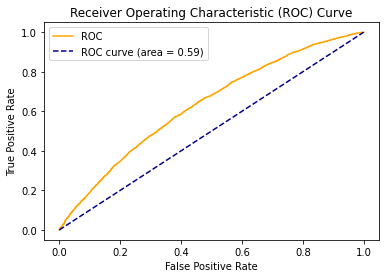

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
average_precision

0.5581767864522564

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.56')

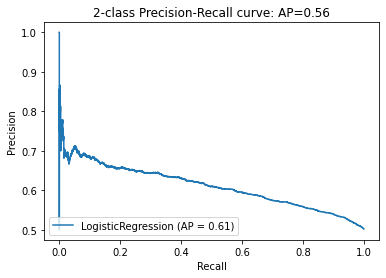

In [63]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(log_reg, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

###Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model

In [64]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8905552186138832

In [67]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[8352,  679],
       [1306, 7800]])

In [68]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [69]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy


0.8905552186138832

In [70]:
Precision = true_positive/(true_positive+false_positive)
Precision


0.924814527737792

In [71]:
Recall = true_positive/(true_positive+false_negative)
Recall


0.8647753158003727

In [72]:
f1=2*((Precision * Recall )) /(Precision + Recall)
f1

0.8937877896088608

In [73]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.8906963040621753

In [74]:
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob[:,1]

array([0.46246986, 0.36635527, 0.64586238, ..., 0.533293  , 0.27708636,
       0.46775478])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

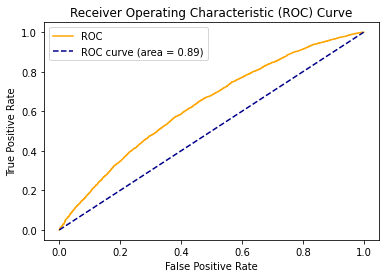

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [76]:
average_precision = average_precision_score(y_test, y_pred)
average_precision

0.85999063647352

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.86')

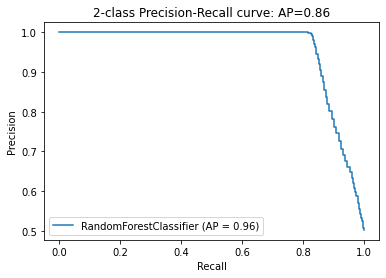

In [77]:
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#### XGBoost 

In [78]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

y_pred = my_model.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [79]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6438771571924795

#### Decision Tress Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt_classifier.fit(X_train, y_train)  

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

0.7994155593538071

In [82]:
accuracy

0.7994155593538071

In [83]:
pd.Series(clf.feature_importances_, index=X.columns)

CustomerID               0.034474
MonthlyRevenue           0.030086
MonthlyMinutes           0.031132
TotalRecurringCharge     0.023147
DirectorAssistedCalls    0.016262
                           ...   
Occupation_Self          0.001018
Occupation_Student       0.000610
MaritalStatus_No         0.004872
MaritalStatus_Unknown    0.004385
MaritalStatus_Yes        0.004408
Length: 840, dtype: float64

**Result:-**
> So as we can see from the aforementioned results, RandomForest Classifier is the best model for predicting the churners and non-churner for the upcoming months in advance.

### Q4.3 Identify most important features impacting churn

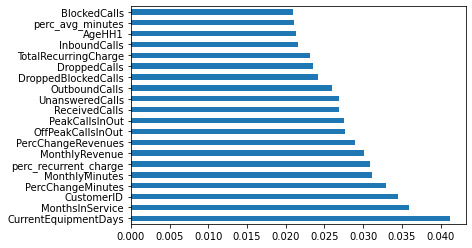

In [84]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')